# Noise
Understanding signal noise helps us eliminate it. 

**Noise**  also  refers  to  a  signal  that  contains  components  at  many  frequencies,  so  it lacks  the harmonic  structure of  the  periodic  signals we saw in previous chapters.

In [118]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Audio

## Uncorrelated Noise
Uncorrelated noise is nothing but uniform noise. In uniform noise, the values in the signal are very random. It is uncorrelated because all the values in the signal are independent of each other

(0.0, 0.1)

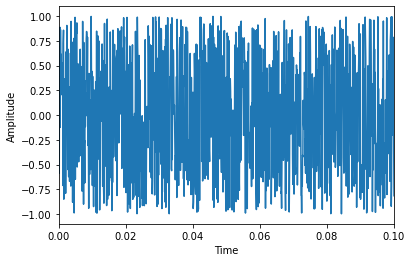

In [137]:
duration = 0.5
framerate = 11025
amplitude = 1
ts = np.linspace(0,duration,int(framerate*duration))
ys = np.random.uniform(-amplitude, amplitude, len(ts))
plt.plot(ts, ys)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim(0,0.1)

In [138]:
# lets hear the audio
audio = Audio(data=ys, rate=framerate)
audio

### Power Spectrum of Uncorrelated Noise
In spectrum of the signal, we plotted the _amplitude vs frequency_ graph. In *power* spectrum, we plot the _amplitude squared vs frequency_ graph. Why? Because it is more conventional with respect to noise. If you know a better reason, then please let me know :)

In [139]:
def spectrum(signal, sr):
    A = np.fft.fft(signal, norm="backward")
    F = np.fft.fftfreq(signal.shape[0], d=1/sr)
    A = np.abs(A)
    if len(signal)<sr:
        return F[0:len(signal)//2],A[0:len(signal)//2]
    else:
        return F[0:sr//2], A[0:sr//2]

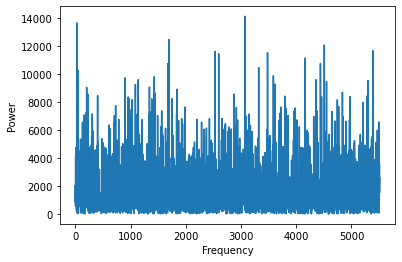

In [141]:
F, A = spectrum(ys, framerate)
plt.plot(F,A**2)
plt.xlabel('Frequency')
plt.ylabel('Power');

It is no surprise that the spectrum of the signal is random. But, what do we actually mean by the word _random_? Here we will associate three things with noise signal or its spectrum.

- **Distribution**: The distribution of a random signal is the set of possiblevalues and their probabilities.  For example, in the uniform noise signal,the set of values is the range from -1 to 1, and all values have the same probability.  An alternative is Gaussian noise, where the set of valuesis the range from negative to positive infinity, but values near 0 are themost likely, with probability that drops off according to the Gaussian or“bell” curve.



- **Correlation**: Is  each value in the signal independent of the others, or are there dependencies between them?  In Uniform Uncorrelated noise, the values are independent.  An alternative is Brownian noise, where each value is the sum of the previous value and a random "state".  So if the value of the signal is high at a particular point in time, we expect it to stay high, and if itis low, we expect it to stay low.



- **Relationship between power and frequency**: In the spectrum of Uniform Uncorrelated noise,the power at all frequencies is drawn from the same distribution; that is,the average power is the same for all frequencies.  An alternative is pink noise, where power is inversely related to frequency; that is, the power at frequency f is drawn from a distribution whose mean is proportionalto 1/f

### Integrated Spectrum
Relationship between power and frequency

Text(0, 0.5, 'Cum Sum of Power')

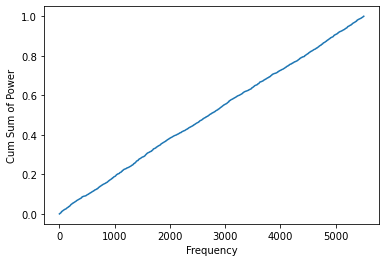

In [143]:
cs = np.cumsum(A**2)
cs = cs/cs[-1]
plt.plot(F, cs)
plt.xlabel("Frequency")
plt.ylabel("Cum Sum of Power")

The straight line indicates that the power at all frequencies is constant. Noise with equal power at all frequencies is called **White Noise**. Recall that white light is an equal mixture of light at all visible frequencies!

## Brownian Noise
Uniform Uncorrelated noise is uncorrelated,  which means that each value does not depend on the other values.  An alternative is Brownian noise, in which each value is the sum of the previous value and a random "step".

In [144]:
def unbias(y):
    '''
    standardise the value in array y so that its mean is 0 and std = 1
    '''
    y_mean = np.mean(y)
    y = (np.array([i-y_mean for i in y]))/np.std(y)
    return y

def normalise(y, a, b):
    '''
    normalise y between the range a and b
    '''
    y = ( (y-np.min(y))/(np.max(y)-np.min(y))) * (b-a)
    y = y + a
    return y

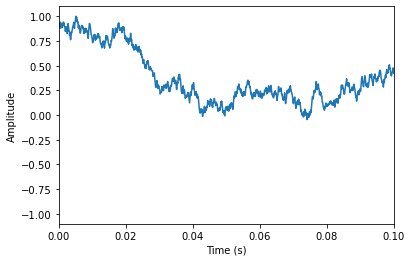

In [148]:
duration = 0.5
framerate = 11025
amplitude = 1
ts = np.linspace(0,duration,int(framerate*duration))
dys = np.random.uniform(-amplitude, amplitude, len(ts))
ys = np.cumsum(dys)
ys = normalise(unbias(ys), -amplitude, amplitude)
plt.plot(ts, ys)
plt.xlim(0,0.10)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude');

Text(0, 0.5, 'Amplitude')

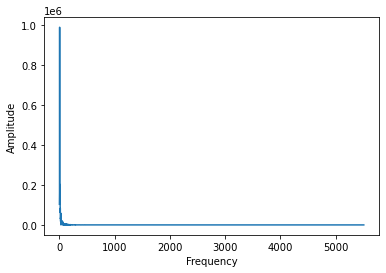

In [149]:
F, A = spectrum(ys, framerate)
plt.plot(F, A**2)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

The spectrum of Brownian noise shows us that nearly  all  of  the  power  is  at  the  lowest frequencies; the higher frequency components are not visible. We can visualise the above plot better to make this point more clear. 

Text(0, 0.5, 'Amplitude')

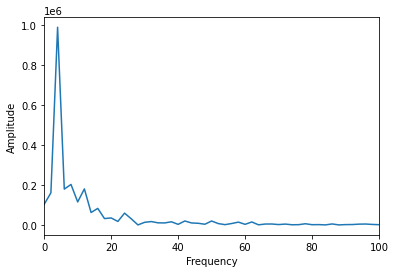

In [150]:
plt.plot(F, A**2)
plt.xlim(0,100)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

To see the shape of the spectrum more clearly, we can plot power and frequencyon a log-log scale.

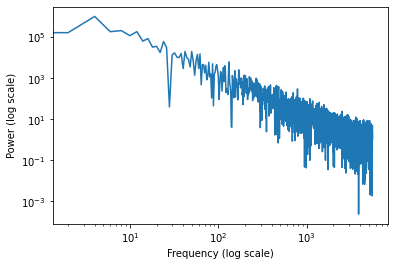

In [151]:
plt.plot(F, A**2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (log scale)')
plt.ylabel('Power (log scale)');

The relationship between power and frequency is noisy, but roughly linear.

### Brownian Noise is called *Red* Noise. Lets see why?

In [152]:
import scipy

In [167]:
x = np.log(F[1:])
y = np.log((A**2)[1:])
t = scipy.stats.linregress(x,y)
slope = t[0]

In [168]:
slope

-1.7609927025122296

$$\log(A^2) = k -1.76 \log(F)$$

Exponentiating both sides we get

$$\exp \log(A^2) = \exp(k) - \exp(1.76\log(f))$$ or

$$A^2 = \frac{K}{f^{1.76}}$$, Let $P = A^2$ be the power, and $K = \exp{k}$, then

$$P = \frac{K}{f^{1.76}}$$

We see that, Power $P$ is nearly proportional to $\frac{1}{F^2}$. Brownian noise is also called red noise, for the same reason that white noise is called "white".  If you combine visible light with power proportional to $\frac{1}{F^2}$,most of the power would be at the low-frequency end of the spectrum, which is  red. 

## Pink Noise
There is nothing special about the factor $2$ in the relationship between Power and Frequency. More generally, we can synthesize noise with any exponent $\beta$, or

$$P = \frac{K}{f^\beta}$$.

When $\beta = 0$, power is constant at all frequencies, so the result is white noise. When $\beta = 2$ the result is red noise. When $\beta$ is between $0$ and $2$, the result is between white and red noise, so it iscalled **pink noise**. The  simplest  way to  generate pink noise is to generate white noise and then apply a low-pass filter with the desired exponent.

## Gaussian Noise
The only difference between uncorrelated uniform noise and uncorrelated gaussian noise is the distribution from where the sigal value comes. Uncorrelated Gaussian noise is similar in many ways to uncorrelated uniform noise.  The spectrum has equal power at all frequencies, on average, so uncorrelated Gaussian is also white. By default, the mean of the normal distribution is 0 and the standard deviation is 1. This means that, we expect about 99% of the values to be between -3 and 3. 


And it has one other interesting property: The spectrum of uncorrelated Gaussian noise is also uncorrelated Gaussian noise.  More precisely,the real and imaginary parts of the spectrum are uncorrelated Gaussian values.

(0.0, 0.1)

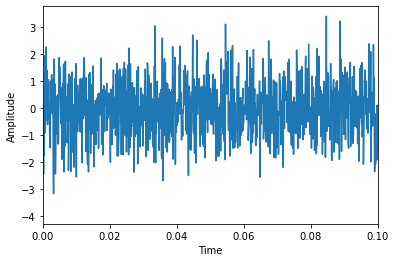

In [183]:
duration = 0.5
framerate = 11025
ts = np.linspace(0,duration,int(framerate*duration))
ys = np.random.normal(loc=0.0, scale=1.0, size=len(ts))
plt.plot(ts, ys)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim(0,0.1)

To test the claim if spectrum of uncorrelated Gaussian noise is also uncorrelated Gaussian noise, we can generate the spectrum of uncorelated Gaussian noise and then generate a "normal probability plot", which is a graphical way to test whether adistribution is Gaussian.

In [193]:
# We modify our spectrum function so that we get both the real and imaginary part of the signal
def spectrum(signal, sr):
    A = np.fft.fft(signal, norm="backward")
    F = np.fft.fftfreq(signal.shape[0], d=1/sr)
    #A = np.abs(A)
    if len(signal)<sr:
        return F[0:len(signal)//2],A[0:len(signal)//2]
    else:
        return F[0:sr//2], A[0:sr//2]

In [194]:
F, A = spectrum(ys, framerate)

Text(0, 0.5, 'Real')

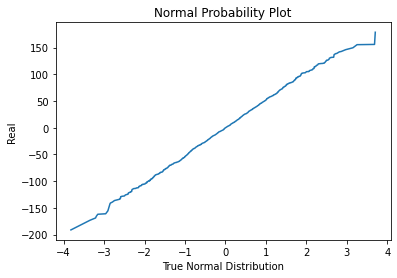

In [199]:
# steps to generate normal probability plot

# step 1: sort the signal that we want to test
A_real_sorted = np.sort(A.real)

# step 2: create a normal distribution with mean 0 and std 1 which is of the same length as the signal -
# - that we want to test.

# step 3: Sort the signal that we created in step 3
true = np.sort(np.random.normal(loc=0.0, scale=1.0, size=len(A.real)))

# plot the signal that we want to test as a function of the true normal distribution
plt.plot(true, A_real_sorted)
plt.title("Normal Probability Plot")
plt.xlabel("True Normal Distribution")
plt.ylabel("Real")

# Inferance: if the distribution of the sample is approximately normal, the result is a straight line

Text(0, 0.5, 'Imag')

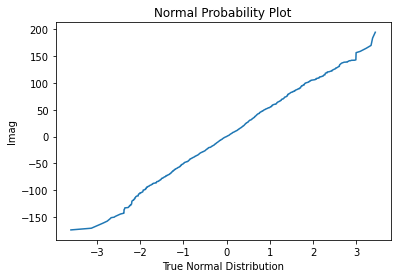

In [200]:
# steps to generate normal probability plot

# step 1: sort the signal that we want to test
A_real_sorted = np.sort(A.imag)

# step 2: create a normal distribution with mean 0 and std 1 which is of the same length as the signal -
# - that we want to test.

# step 3: Sort the signal that we created in step 3
true = np.sort(np.random.normal(loc=0.0, scale=1.0, size=len(A.imag)))

# plot the signal that we want to test as a function of the true normal distribution
plt.plot(true, A_real_sorted)
plt.title("Normal Probability Plot")
plt.xlabel("True Normal Distribution")
plt.ylabel("Imag")

# Inferance: if the distribution of the sample is approximately normal, the result is a straight line

A straight line on a normal probability plot indicates that the data come from a Gaussian distribution.

The spectrum of uncorrelated uniform noise is also uncorrelated Gaussian noise, at least approximately.  In fact,by the **Central Limit Theorem**, the spectrum of almost any uncorrelated noise is  approximately  Gaussian,  as  long  as  the  distribution  has  finite  mean  and standard deviation, and the number of samples is large.